# Imports

In [1]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns

## Def describe

In [2]:
def describe(df, random=False):
    print(df.shape)
    print("--- First 5 entries ---")
    display(df.head())
    if random:
        print('--- Random subset ---')
        display(df.sample(5))

## Read one2one h5ad

In [3]:
adata = sc.read(
#     "/home/phoenix/data_lg/data_sm_copy/code/immune-evolution/h5ads/human-lemur-mouse-bat__lung_only_copy.h5ad"
    "/home/olga/data_lg/data_sm_copy/immune-evolution/h5ads/human-lemur-mouse-bat/human-lemur-mouse-bat__lung_only.h5ad"
)
adata.obs = adata.obs.reset_index().set_index('cell_id')
SHARED_CELLTYPES = ['Alveolar Epithelial Type 2',
 'B cell',
 'Capillary',
 'Dendritic',
 'Fibroblast',
 'Macrophage',
 'Monocyte',
 'Natural Killer T cell',
 'Smooth Muscle and Myofibroblast',
 'T cell']
len(SHARED_CELLTYPES)

adata_shared = adata[adata.obs.broad_group.isin(SHARED_CELLTYPES)]
adata_shared

/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 89795 × 10560
    obs: 'index', 'age', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'free_annotation', 'individual', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'tissue', 'narrow_group', 'broad_group', 'compartment_group', 'compartment_narrow', 'channel_cleaned', 'batch', 'n_genes', 'n_counts', 'species_batch_v2', 'compartment_broad', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'common_individual_id'
    var: 'bat__gene_name', 'mouse_lemur__gene_name-bat', 'mouse__gene_name-bat', 'mouse_lemur__gene_name_x-hlm', 'mouse__gene_name_x-hlm', 'gene_ids-lemur-hlm', 'n_cells-mouse-hlm', 'mouse_lemur__gene_name_y-hlm', 'mouse__gene_name_y-hlm'

# Read parquet files

## File paths

In [4]:
sketch_id = 'alphabet-dayhoff__ksize-51__scaled-10'
sig_outdir_base = "/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures"


parquets = glob.glob(f'/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/*/2--single-cell-kmers/{sketch_id}/hash2kmer__unique_kmers_per_celltype.parquet')
parquets

['/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/4--test-lemur/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet']

In [5]:
# parquets = glob.glob(f'/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/*/2--single-cell-kmers/*/hash2kmer__unique_kmers_per_celltype.parquet')
# parquets

In [6]:
%%time
dfs = []

for parquet in parquets:
    ! ls -lha $parquet
    %time df = pd.read_parquet(parquet)
    df = df.rename(columns={'broad_group': 'groundtruth_celltype'})
    dfs.append(df)
    
hash2kmer = pd.concat(dfs)
describe(hash2kmer)

-rw-r--r-- 1 olga czb 2.4G May  3 11:03 /home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet
CPU times: user 43.5 s, sys: 21.7 s, total: 1min 5s
Wall time: 40.8 s
-rw-r--r-- 1 olga czb 5.0G May 10 13:26 /home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet
CPU times: user 2min, sys: 1min, total: 3min 1s
Wall time: 2min 43s
-rw-r--r-- 1 olga czb 149M Apr 30 13:26 /home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/4--test-lemur/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet
CPU times: user 2.91 s, sys: 1.72 s, total: 4.63 s
Wall time: 4.19 s
-rw-r--r-- 1 olga czb 3.3G May  3 11:12 /home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/2--sin

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


CPU times: user 4min 55s, sys: 2min 42s, total: 7min 38s
Wall time: 6min 40s


## Read predicted cell types

In [7]:
predicted_cells_min_5_percent = pd.read_parquet(
    os.path.join(sig_outdir_base, "aggregated-predicted-cells.parquet")
)
predicted_cells_min_5_percent = predicted_cells_min_5_percent.query('sketch_id == @sketch_id')
describe(predicted_cells_min_5_percent)

(29750, 43)
--- First 5 entries ---


,similarity,mouse1_broad_group,search_method,database_type,sketch_id,mol_or_alpha,alphabet,ksize,sketch_style,sketch_value,...,bat_narrow_group,bat_broad_group,bat_compartment_group,human_channel,human_cell_ontology_class,human_narrow_group,human_broad_group,human_compartment_group,predicted_compartment,groundtruth_compartment
query_cell_id,,,,,,,,,,,,,,,,,,,,,
MACA_18m_F_LUNG_51__AAACCTGCAGCCTATA,0.119992,T cell,similarity_abundance,min-5-percent-shared-kmers-remove-common-kmers,alphabet-dayhoff__ksize-51__scaled-10,alphabet,dayhoff,51,scaled,10,...,None,None,None,None,None,None,None,None,lymphoid,lymphoid
MACA_18m_F_LUNG_51__AAACCTGGTGTGGTTT,0.170558,B cell,similarity_abundance,min-5-percent-shared-kmers-remove-common-kmers,alphabet-dayhoff__ksize-51__scaled-10,alphabet,dayhoff,51,scaled,10,...,None,None,None,None,None,None,None,None,lymphoid,lymphoid
MACA_18m_F_LUNG_51__AAACGGGAGTTTCCTT,0.080257,T cell,similarity_abundance,min-5-percent-shared-kmers-remove-common-kmers,alphabet-dayhoff__ksize-51__scaled-10,alphabet,dayhoff,51,scaled,10,...,None,None,None,None,None,None,None,None,lymphoid,lymphoid
MACA_18m_F_LUNG_51__AAACGGGCAGTTCATG,0.263881,Monocyte,similarity_abundance,min-5-percent-shared-kmers-remove-common-kmers,alphabet-dayhoff__ksize-51__scaled-10,alphabet,dayhoff,51,scaled,10,...,None,None,None,None,None,None,None,None,myeloid,myeloid
MACA_18m_F_LUNG_51__AAACGGGGTCATCCCT,0.326669,Monocyte,similarity_abundance,min-5-percent-shared-kmers-remove-common-kmers,alphabet-dayhoff__ksize-51__scaled-10,alphabet,dayhoff,51,scaled,10,...,None,None,None,None,None,None,None,None,myeloid,myeloid


### Join hash2kmer with predicted cell types

In [8]:
celltype_predictions = predicted_cells_min_5_percent[
    ["predicted_celltype", "groundtruth_compartment", "predicted_compartment"]
]
celltype_predictions.index = celltype_predictions.index.str.upper()
describe(celltype_predictions)

(29750, 3)
--- First 5 entries ---


,predicted_celltype,groundtruth_compartment,predicted_compartment
query_cell_id,,,
MACA_18M_F_LUNG_51__AAACCTGCAGCCTATA,T cell,lymphoid,lymphoid
MACA_18M_F_LUNG_51__AAACCTGGTGTGGTTT,B cell,lymphoid,lymphoid
MACA_18M_F_LUNG_51__AAACGGGAGTTTCCTT,T cell,lymphoid,lymphoid
MACA_18M_F_LUNG_51__AAACGGGCAGTTCATG,Monocyte,myeloid,myeloid
MACA_18M_F_LUNG_51__AAACGGGGTCATCCCT,Monocyte,myeloid,myeloid


In [9]:
hash2kmer.cell_id = hash2kmer.cell_id.str.upper()

In [10]:
hash2kmer_with_predictions = hash2kmer.join(celltype_predictions, on='cell_id')
describe(hash2kmer_with_predictions)

(148123511, 16)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,predicted_celltype,groundtruth_compartment,predicted_compartment
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Fibroblast,stromal,stromal
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Fibroblast,stromal,stromal
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Fibroblast,stromal,stromal
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Fibroblast,stromal,stromal
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Fibroblast,stromal,stromal


In [11]:
hash2kmer_with_predictions['hashval'] = hash2kmer_with_predictions['hashval'].astype(str)

### Write joined to parquet

In [12]:
hash2kmer_with_predictions.to_parquet(
    os.path.join(sig_outdir_base, f"aggregated-hash2kmer-with-predicted-cells__{sketch_id}.parquet")
)

## Seems like some cell ids aren't there .. why?

In [13]:
hash2kmer_cell_ids = set(hash2kmer.cell_id)

In [14]:
adata_shared.obs.index = adata_shared.obs.index.str.upper()

In [15]:
cell_ids_not_in_hash2kmer = adata_shared.obs.index.difference(hash2kmer_cell_ids)
len(cell_ids_not_in_hash2kmer)

61250

In [16]:
adata_shared.obs.loc[cell_ids_not_in_hash2kmer].species.value_counts()

Human          27521
Mouse lemur    18284
Mouse          15372
Bat               73
Name: species, dtype: int64

In [17]:
channel_sizes = adata_shared.obs.groupby('channel').size()

In [18]:
no_id_present_channel_sizes = adata_shared.obs.loc[cell_ids_not_in_hash2kmer].groupby('channel').size()

In [19]:
no_id_present_channel_sizes

channel
10X_P1_6                  7680
10X_P1_14                 1413
10X_P2_5                   825
10X_P3_0                   447
10X_P5_13                  936
10X_P5_14                 1202
10X_P7_8                   294
10X_P7_9                   745
10X_P8_12                  489
10X_P8_13                 1327
Antoine_Lung_CD31_10X     5873
Antoine_Lung_EPCAM_10X    2647
Antoine_Lung_P3_10X       3547
Bernard_Lung_10X          2596
MACA_18m_F_LUNG_50          14
MACA_18m_F_LUNG_51           0
MACA_18m_M_LUNG_52           0
MACA_18m_M_LUNG_53           0
MACA_21m_F_LUNG_54           0
MACA_21m_F_LUNG_55           0
Martine_Lung_1_10X         856
Martine_Lung_2_10X         887
P1_2                      1677
P1_3                      1932
P1_4                      2265
P2_1                      2921
P2_2                      2764
P2_3                      2328
P2_4                       882
P2_5                      3817
P2_6                       922
P2_7                      2953


In [20]:
100 * no_id_present_channel_sizes/channel_sizes

channel
10X_P1_6                  100.000000
10X_P1_14                 100.000000
10X_P2_5                  100.000000
10X_P3_0                  100.000000
10X_P5_13                 100.000000
10X_P5_14                 100.000000
10X_P7_8                  100.000000
10X_P7_9                  100.000000
10X_P8_12                 100.000000
10X_P8_13                 100.000000
Antoine_Lung_CD31_10X     100.000000
Antoine_Lung_EPCAM_10X    100.000000
Antoine_Lung_P3_10X        81.521489
Bernard_Lung_10X          100.000000
MACA_18m_F_LUNG_50          5.000000
MACA_18m_F_LUNG_51          0.000000
MACA_18m_M_LUNG_52          0.000000
MACA_18m_M_LUNG_53          0.000000
MACA_21m_F_LUNG_54          0.000000
MACA_21m_F_LUNG_55          0.000000
Martine_Lung_1_10X        100.000000
Martine_Lung_2_10X        100.000000
P1_2                      100.000000
P1_3                      100.000000
P1_4                      100.000000
P2_1                      100.000000
P2_2                      100.

In [21]:
celltype_hashvals = hash2kmer.groupby(['species', 'groundtruth_celltype']).alignment_status.value_counts()
celltype_hashvals.head()

species  groundtruth_celltype        alignment_status
bat      Alveolar Epithelial Type 2  aligned             13522422
                                     unaligned             759922
         B cell                      aligned              1055558
                                     unaligned              58700
         Capillary                   aligned             14688263
Name: alignment_status, dtype: int64

In [22]:
celltype_hashvals

species  groundtruth_celltype             alignment_status
bat      Alveolar Epithelial Type 2       aligned             13522422
                                          unaligned             759922
         B cell                           aligned              1055558
                                          unaligned              58700
         Capillary                        aligned             14688263
                                                                ...   
mouse    Natural Killer T cell            unaligned              42411
         Smooth Muscle and Myofibroblast  aligned               184572
                                          unaligned               5618
         T cell                           aligned              5653466
                                          unaligned             189747
Name: alignment_status, Length: 78, dtype: int64

In [23]:
celltype_hashval_percentage = celltype_hashvals.groupby(level=[0, 1]).apply(lambda x: 100 * x/x.sum())
celltype_hashval_percentage.name = 'percentage'
celltype_hashval_percentage = celltype_hashval_percentage.reset_index()
celltype_hashval_percentage

,species,groundtruth_celltype,alignment_status,percentage
0,bat,Alveolar Epithelial Type 2,aligned,94.679291
1,bat,Alveolar Epithelial Type 2,unaligned,5.320709
2,bat,B cell,aligned,94.731920
3,bat,B cell,unaligned,5.268080
4,bat,Capillary,aligned,95.639091
...,...,...,...,...
73,mouse,Natural Killer T cell,unaligned,3.501037
74,mouse,Smooth Muscle and Myofibroblast,aligned,97.046112
75,mouse,Smooth Muscle and Myofibroblast,unaligned,2.953888
76,mouse,T cell,aligned,96.752694


In [24]:
celltype_hashval_percentage_unaligned = celltype_hashval_percentage.query('alignment_status == "unaligned"')


In [25]:
order = celltype_hashval_percentage_unaligned.query('species == "bat"').sort_values(
    "percentage"
)["groundtruth_celltype"]
order

9                          Fibroblast
5                           Capillary
17    Smooth Muscle and Myofibroblast
11                         Macrophage
19                             T cell
13                           Monocyte
15              Natural Killer T cell
3                              B cell
1          Alveolar Epithelial Type 2
7                           Dendritic
Name: groundtruth_celltype, dtype: category
Categories (10, object): ['Alveolar Epithelial Type 2', 'B cell', 'Capillary', 'Dendritic', ..., 'Monocyte', 'Natural Killer T cell', 'Smooth Muscle and Myofibroblast', 'T cell']

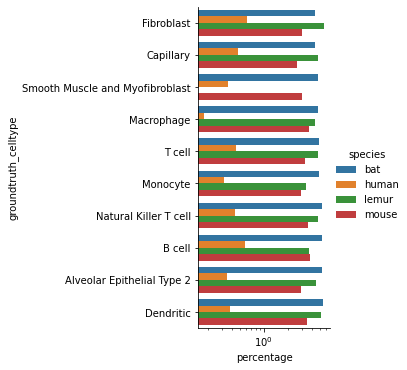

In [26]:
g = sns.catplot(
    data=celltype_hashval_percentage_unaligned,
    y="groundtruth_celltype",
    x="percentage",
    hue="species",
    kind="bar",
    order=order
)
g.set(xscale="log")

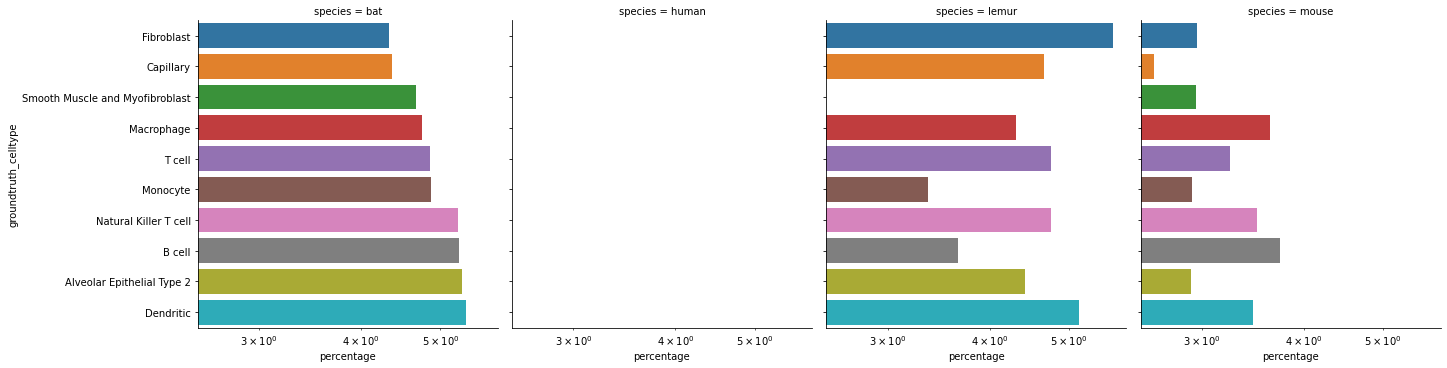

In [27]:
g = sns.catplot(
    data=celltype_hashval_percentage_unaligned,
    y="groundtruth_celltype",
    x="percentage",
    col="species",
    kind="bar",
    order=order
)
g.set(xscale="log")

## Read mouse diagnostic k-mer csvs

In [28]:
mouse_dir = '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/'
celltype_kmer_subdir = '5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent'

mouse_celltype_kmer_csvs = glob.glob(os.path.join(mouse_dir, celltype_kmer_subdir, sketch_id, 'csvs', '*csv'))
mouse_celltype_kmer_csvs

['/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/natural_killer_t_cell.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/alveolar_epithelial_type_2.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/smooth_muscle_and_myofibroblast.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent/alphabet-dayhoff__ksize-51__scaled-10/csvs/monocyte.csv',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-si

In [29]:
%%time

dfs = []

for csv in mouse_celltype_kmer_csvs:
    basename = os.path.basename(csv)
    print('\ncelltype file:', )
    %time df = pd.read_csv(csv)
    df['celltype'] = basename.split('.')[0]
    dfs.append(df)
mouse_celltype_kmers = pd.concat(dfs)
describe(mouse_celltype_kmers)


celltype file:
CPU times: user 4.66 s, sys: 1.88 s, total: 6.54 s
Wall time: 6.98 s

celltype file:
CPU times: user 1.26 s, sys: 117 ms, total: 1.37 s
Wall time: 1.87 s

celltype file:
CPU times: user 438 ms, sys: 59 ms, total: 497 ms
Wall time: 741 ms

celltype file:
CPU times: user 23.5 s, sys: 2 s, total: 25.5 s
Wall time: 32.3 s

celltype file:
CPU times: user 7.21 s, sys: 553 ms, total: 7.77 s
Wall time: 10 s

celltype file:
CPU times: user 3.23 s, sys: 172 ms, total: 3.4 s
Wall time: 4.54 s

celltype file:
CPU times: user 4.12 s, sys: 308 ms, total: 4.43 s
Wall time: 5.62 s

celltype file:
CPU times: user 9.71 s, sys: 668 ms, total: 10.4 s
Wall time: 13.3 s

celltype file:
CPU times: user 2.08 s, sys: 171 ms, total: 2.25 s
Wall time: 2.93 s

celltype file:
CPU times: user 2.07 s, sys: 163 ms, total: 2.23 s
Wall time: 2.97 s
(22370943, 5)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,celltype
0,KLSSPRGGMKKKTTHFG,debbbdbbedddbbdfb,308103755003737144,A00111:73:H3YHNDMXX:2:1218:21983:15264\tCB:Z:A...,natural_killer_t_cell
1,LSSPRGGMKKKTTHFGE,ebbbdbbedddbbdfbc,177719887282804153,A00111:73:H3YHNDMXX:2:1218:21983:15264\tCB:Z:A...,natural_killer_t_cell
2,YTVGKRFKEANNFLRPF,fbebddfdcbccfedbf,1822116523473074621,A00111:73:H3YHNDMXX:1:2311:5367:19179\tCB:Z:AA...,natural_killer_t_cell
3,KFGIICMEDLIQDIYTI,dfbeeaecceeccefbe,115722640331910096,A00111:73:H3YHNDMXX:2:1175:17463:20556\tCB:Z:A...,natural_killer_t_cell
4,KFGIICMEDLIQEIYTV,dfbeeaecceeccefbe,115722640331910096,A00111:73:H3YHNDMXX:2:2229:8260:32111\tCB:Z:AA...,natural_killer_t_cell


CPU times: user 1min 10s, sys: 10.9 s, total: 1min 21s
Wall time: 1min 37s


# Overlap in hashes for cell types

In [30]:
hash2kmer.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


## Remove lemur for now

In [31]:
hash2kmer_no_lemur = hash2kmer.query('species != "lemur"')
hash2kmer_no_lemur.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


## get diagnostic k-mers for each species and 

In [32]:
hash2kmer_no_lemur.groupby

<bound method DataFrame.groupby of         kmer_in_sequence   kmer_in_alphabet              hashval  \
0      DLNVKPKTIKTLEENLG  cecedbdbedbeccceb   550348301278027135   
1      IKTLEENLGITIQDIGV  edbecccebebeccebe   974148631326387115   
3      CRKLKLDPFLTPYTKIN  addedecbfebbfbdec  1662986983738689810   
4      RKLKLDPFLTPYTKINS  ddedecbfebbfbdecb   799720167227311772   
7      LDPFLTPYTKINSRWIK  ecbfebbfbdecbdfed   537198855570371996   
...                  ...                ...                  ...   
23409  FIWNPRLSKVSHRSSSV  fefcbdebdebddbbbe   989408111628569969   
23410  VSHRSSSVLSHGLCVDT  ebddbbbeebdbeaecb    62515329136865349   
23413  VFLFLSSSLPFLFSLFH  efefebbbebfefbefd  1563197722135732861   
23415  SSSLPFLFSHFPMYSAL  bbbebfefbdfbefbbe   605995314189153464   
23416  PFLFSHFPMYSALIPLL  bfefbdfbefbbeebee   741982259205681112   

                                               read_name gene_name species  \
0      A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...      None   h

In [34]:
for celltype, df in hash2kmer_no_lemur.groupby("groundtruth_celltype"):
    species_hashes = df.groupby('species').kmer_in_alphabet.apply(lambda x: set(x)).to_dict()
    break

### Matplotlib venn diagrams

In [35]:
import matplotlib_venn

In [36]:
hashes = list(species_hashes.values())
# hashes

In [37]:
len(hashes)

3

In [38]:
celltype

'Alveolar Epithelial Type 2'

In [39]:
df.groupby('species').cell_id.nunique()

species
bat       832
human    3150
mouse      51
Name: cell_id, dtype: int64

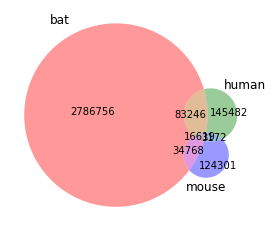

In [40]:
matplotlib_venn.venn3(list(species_hashes.values()), set_labels=list(species_hashes.keys()))

### Bat has the most unique hashes per cell type but has the fewest cells??

In [41]:
hash2kmer_no_lemur.groupby(['species']).apply(lambda x: x.hashval.nunique()/x.cell_id.nunique())

species
bat      1247.856290
human      34.499011
mouse     930.735554
dtype: float64

## Try UpSet Plot

In [42]:
import upsetplot as up

In [43]:
upsetplot_data = up.from_contents(species_hashes)
upsetplot_data.head()

id
bat  human mouse                   
True False False  cecebbeffcbebeddc
           False  ebbbbcbcebdbbbcdb
           False  bbbbbbeefcfbdeeeb
           False  efbafcccdcbebbcee
           False  cbbbebebcdefbbebb

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:title={'center':'Alveolar Epithelial Type 2'}, ylabel='Intersection size'>}

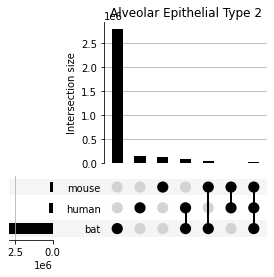

In [44]:
upsetplotted = up.plot(upsetplot_data)
upsetplotted['intersections'].set_title(celltype)
upsetplotted

## Do on all celltypes

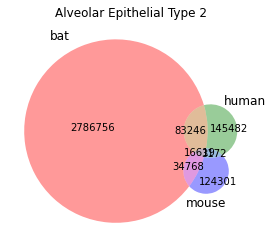

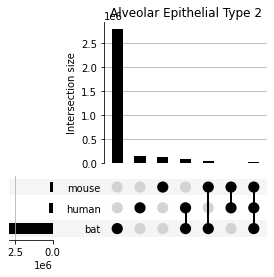

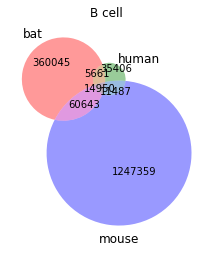

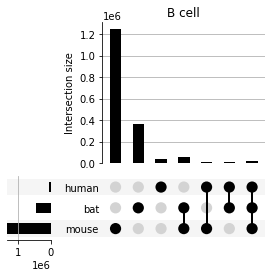

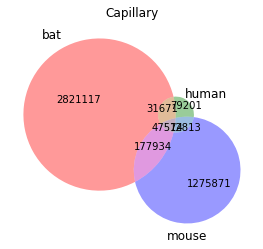

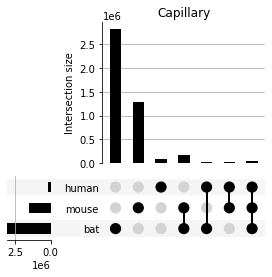

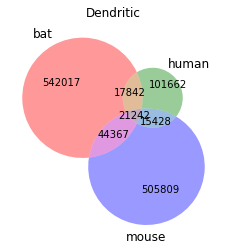

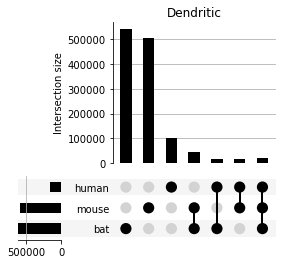

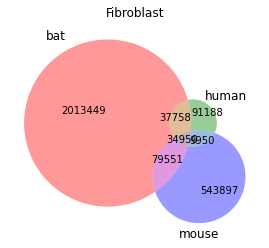

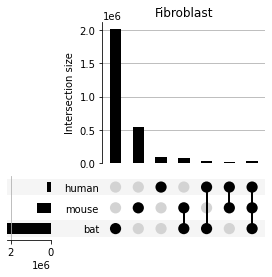

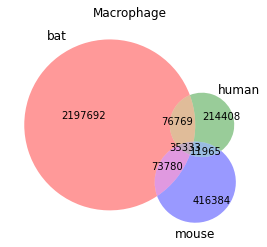

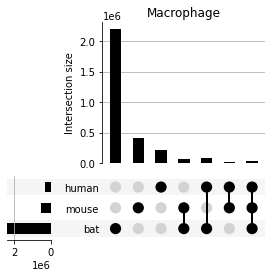

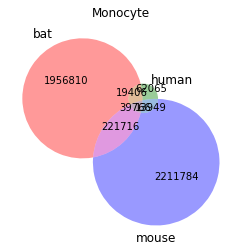

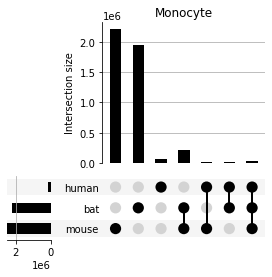

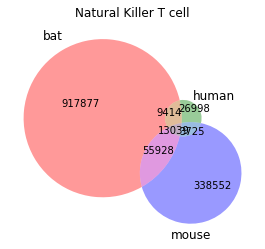

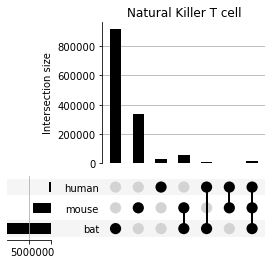

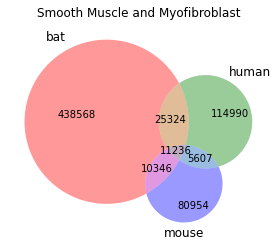

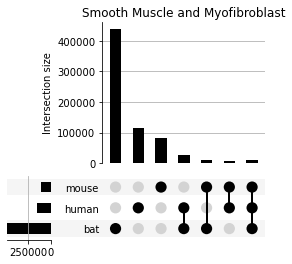

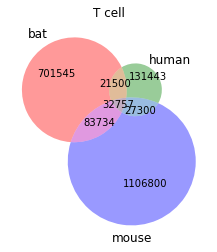

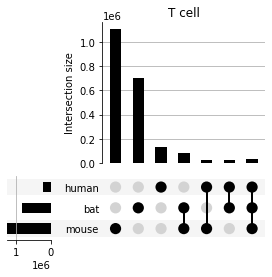

In [45]:
for celltype, df in hash2kmer_no_lemur.groupby("groundtruth_celltype"):
    species_hashes = (
        df.groupby("species").kmer_in_alphabet.apply(lambda x: set(x)).to_dict()
    )
    fig, ax = plt.subplots()

    matplotlib_venn.venn3(
        list(species_hashes.values()), set_labels=list(species_hashes.keys())
    )
    ax.set(title = celltype)
    
    upsetplot_data = up.from_contents(species_hashes)
    upsetplotted = up.plot(upsetplot_data)
    upsetplotted['intersections'].set_title(celltype)
#     upsetplotted

## Do on all celltypes, including lemur

In [ ]:
for celltype, df in hash2kmer_with_predictions.groupby("predicted_compartment"):
    species_hashes = (
        df.groupby("species").kmer_in_alphabet.apply(lambda x: set(x)).to_dict()
    )
    upsetplot_data = up.from_contents(species_hashes)
    upsetplotted = up.plot(upsetplot_data)
    upsetplotted['intersections'].set_title(celltype)
#     upsetplotted

## Do on all celltypes, separate by aligned/unaligned

In [ ]:
hash2kmer_no_lemur['species__alignment_status'] = hash2kmer_no_lemur['species'] + ', ' + hash2kmer_no_lemur['alignment_status']
hash2kmer_no_lemur.head()

In [ ]:
# for celltype, df in hash2kmer_no_lemur.groupby("broad_group"):
#     species_hashes = (
#         df.groupby('species__alignment_status').kmer_in_alphabet.apply(lambda x: set(x)).to_dict()
#     )

#     upsetplot_data = up.from_contents(species_hashes)
#     upsetplotted = up.plot(upsetplot_data, sort_by='cardinality')
#     ax = upsetplotted['intersections']
#     ax.set(title=celltype, yscale='log')
# #     upsetplotted

## Get hashes unaligned in bat

In [ ]:
%%time

df_bat_unaligned = df.groupby("hashval").filter(
    lambda x: "bat, unaligned" in set(x["species__alignment_status"])
)
df_bat_unaligned.head()

In [ ]:
species_hashes.keys()

In [ ]:
hash2kmer_no_lemur.groupby(['species', 'broad_group']).cell_id.nunique()

### Not *exactly* the same number of cells as originally, but same order of magnitude

Bat:
```
broad_group
Alveolar Epithelial Type 2          832
B cell                              165
Capillary                          2214
Dendritic                            98
Fibroblast                         1382
Macrophage                         1196
Monocyte                            969
Natural Killer T cell               351
Smooth Muscle and Myofibroblast     120
T cell                              376
Name: cell_id, dtype: int64
```

Human: 
```
broad_group
Alveolar Epithelial Type 2         3150
B cell                              174
Capillary                          2093
Dendritic                           438
Fibroblast                          725
Macrophage                         3356
Monocyte                            752
Natural Killer T cell               224
Smooth Muscle and Myofibroblast     587
T cell                             2655
Name: cell_id, dtype: int64
```

# Gene orthology

## Assign figure folder

In [46]:
figure_folder = (
    "/home/olga/googledrive/ImmuneEvolution/figures/kmer_gene_orthology"
)
!mkdir -p $figure_folder

## Use 1:1 orthologs from Anndata of bat-Lemur-human-mouse

In [47]:
describe(adata_shared.var)

(10560, 9)
--- First 5 entries ---


,bat__gene_name,mouse_lemur__gene_name-bat,mouse__gene_name-bat,mouse_lemur__gene_name_x-hlm,mouse__gene_name_x-hlm,gene_ids-lemur-hlm,n_cells-mouse-hlm,mouse_lemur__gene_name_y-hlm,mouse__gene_name_y-hlm
human__gene_name,,,,,,,,,
SAMD11,SAMD11,SAMD11,Samd11,SAMD11,Samd11,gene2117,5381,SAMD11,Samd11
NOC2L,NOC2L,NOC2L,Noc2l,NOC2L,Noc2l,gene2116,48156,NOC2L,Noc2l
KLHL17,KLHL17,KLHL17,Klhl17,KLHL17,Klhl17,gene2115,11262,KLHL17,Klhl17
ISG15,ISG15,ISG15,Isg15,ISG15,Isg15,gene2111,74269,ISG15,Isg15
AGRN,AGRN,AGRN,Agrn,AGRN,Agrn,gene2110,23538,AGRN,Agrn


## Assign k-mer type based on alignment status and gene name

In [48]:
PER_SPECIES_ORTHOLOGOUS_GENES = {
    "bat": set(adata_shared.var["bat__gene_name"]),
    "lemur": set(adata_shared.var["mouse_lemur__gene_name_x-hlm"]),
    "human": set(adata_shared.var.index),
    "mouse": set(adata_shared.var["mouse__gene_name-bat"]),
}
for k, v in PER_SPECIES_ORTHOLOGOUS_GENES.items():
    print(k, len(v))

bat 10560
lemur 10560
human 10560
mouse 10560


In [49]:
%%time

def is_orthologous(query_gene, species, per_species_orthologous_genes=PER_SPECIES_ORTHOLOGOUS_GENES):
    orthologous_genes = per_species_orthologous_genes[species]
    return query_gene in orthologous_genes


def assign_kmer_category(row):
    if row.alignment_status == 'unaligned':
        return 'Not in reference genome'
    elif pd.isnull(row.gene_name):
        return 'In ref genome, not in a gene'
    elif is_orthologous(row.gene_name, row.species):
        return 'In ref genome, in a 1:1 orthologous gene'
    else:
        return 'In ref genome, not in a 1:1 orthologous gene'

hash2kmer['kmer_category'] = hash2kmer.apply(assign_kmer_category, axis=1)
hash2kmer.groupby(['species', 'kmer_category']).size()

CPU times: user 1h 14min 44s, sys: 2min 33s, total: 1h 17min 18s
Wall time: 1h 17min 27s


species  kmer_category                               
bat      In ref genome, in a 1:1 orthologous gene        12951997
         In ref genome, not in a 1:1 orthologous gene    11802122
         In ref genome, not in a gene                    41883743
         Not in reference genome                          3350575
human    In ref genome, in a 1:1 orthologous gene        17815886
         In ref genome, not in a 1:1 orthologous gene    13476922
         In ref genome, not in a gene                     1973137
         Not in reference genome                           100633
lemur    In ref genome, in a 1:1 orthologous gene          756876
         In ref genome, not in a 1:1 orthologous gene      594885
         In ref genome, not in a gene                      577493
         Not in reference genome                           100244
mouse    In ref genome, in a 1:1 orthologous gene        15732855
         In ref genome, not in a 1:1 orthologous gene    19588670
         In ref genome

In [50]:
hash2kmer_with_predictions = hash2kmer.join(celltype_predictions, on='cell_id')
describe(hash2kmer_with_predictions)

(148123511, 17)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,groundtruth_celltype,kmer_category,predicted_celltype,groundtruth_compartment,predicted_compartment
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast,Not in reference genome,Fibroblast,stromal,stromal


In [51]:
kmer_categories = (
    "Not in reference genome",
    "In ref genome, not in a gene",
    "In ref genome, not in a 1:1 orthologous gene",
    "In ref genome, in a 1:1 orthologous gene",
)

In [52]:
hash2kmer_with_predictions['kmer_category'] = pd.Categorical(hash2kmer_with_predictions['kmer_category'], categories=kmer_categories, ordered=True)

## Write hash2kmer with predictions and orthology to parquet

In [53]:
hash2kmer_with_predictions['hashval'] = hash2kmer_with_predictions['hashval'].astype(str)

In [54]:
hash2kmer_with_predictions.to_parquet(
    os.path.join(sig_outdir_base, f"aggregated-hash2kmer-with-predicted-cells--{sketch_id}--with-orthology.parquet")
)

In [55]:
1+1

2

## Get number of k-mers in different categories per `groundtruth_celltype`

In [56]:
%%time

celltype_col = "groundtruth_celltype"

diagnostic_kmers_n_per_category = hash2kmer_with_predictions.groupby(
    ["species", celltype_col, "kmer_category"]
).hashval.nunique()
diagnostic_kmers_n_per_category.name = "percent_kmers"
diagnostic_kmers_n_per_category

CPU times: user 2min 22s, sys: 21.7 s, total: 2min 44s
Wall time: 2min 44s


species  groundtruth_celltype             kmer_category                               
bat      Alveolar Epithelial Type 2       Not in reference genome                          391623
                                          In ref genome, not in a gene                    1865345
                                          In ref genome, not in a 1:1 orthologous gene     584145
                                          In ref genome, in a 1:1 orthologous gene         689674
         B cell                           Not in reference genome                           39302
                                                                                           ...   
mouse    Smooth Muscle and Myofibroblast  In ref genome, in a 1:1 orthologous gene          48120
         T cell                           Not in reference genome                           97250
                                          In ref genome, not in a gene                     294772
                               

In [57]:
diagnostic_kmers_n_per_category_df = diagnostic_kmers_n_per_category.groupby(level=[0, 1]).apply(lambda x: 100*x/x.sum()).reset_index()
diagnostic_kmers_n_per_category_df

,species,groundtruth_celltype,kmer_category,percent_kmers
0,bat,Alveolar Epithelial Type 2,Not in reference genome,11.091663
1,bat,Alveolar Epithelial Type 2,"In ref genome, not in a gene",52.830856
2,bat,Alveolar Epithelial Type 2,"In ref genome, not in a 1:1 orthologous gene",16.544329
3,bat,Alveolar Epithelial Type 2,"In ref genome, in a 1:1 orthologous gene",19.533152
4,bat,B cell,Not in reference genome,7.596072
...,...,...,...,...
155,mouse,Smooth Muscle and Myofibroblast,"In ref genome, in a 1:1 orthologous gene",42.646720
156,mouse,T cell,Not in reference genome,7.318165
157,mouse,T cell,"In ref genome, not in a gene",22.181904
158,mouse,T cell,"In ref genome, not in a 1:1 orthologous gene",40.089775


In [58]:
diagnostic_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,groundtruth_celltype,kmer_category,percent_kmers
152,mouse,Smooth Muscle and Myofibroblast,Not in reference genome,4.056401
120,mouse,Alveolar Epithelial Type 2,Not in reference genome,4.611873
136,mouse,Fibroblast,Not in reference genome,5.783846
148,mouse,Natural Killer T cell,Not in reference genome,6.092583
132,mouse,Dendritic,Not in reference genome,6.581250
128,mouse,Capillary,Not in reference genome,6.754631
156,mouse,T cell,Not in reference genome,7.318165
140,mouse,Macrophage,Not in reference genome,7.374086
124,mouse,B cell,Not in reference genome,8.734350
144,mouse,Monocyte,Not in reference genome,8.951451


In [59]:
diagnostic_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,groundtruth_celltype,kmer_category,percent_kmers
152,mouse,Smooth Muscle and Myofibroblast,Not in reference genome,4.056401
120,mouse,Alveolar Epithelial Type 2,Not in reference genome,4.611873
136,mouse,Fibroblast,Not in reference genome,5.783846
148,mouse,Natural Killer T cell,Not in reference genome,6.092583
132,mouse,Dendritic,Not in reference genome,6.581250
128,mouse,Capillary,Not in reference genome,6.754631
156,mouse,T cell,Not in reference genome,7.318165
140,mouse,Macrophage,Not in reference genome,7.374086
124,mouse,B cell,Not in reference genome,8.734350
144,mouse,Monocyte,Not in reference genome,8.951451


In [60]:
diagnostic_kmers_n_per_category_df.query(
    '(species == "lemur") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

,species,groundtruth_celltype,kmer_category,percent_kmers
104,lemur,Monocyte,Not in reference genome,3.405447
84,lemur,B cell,Not in reference genome,3.751750
100,lemur,Macrophage,Not in reference genome,4.369957
80,lemur,Alveolar Epithelial Type 2,Not in reference genome,4.455482
88,lemur,Capillary,Not in reference genome,4.700067
116,lemur,T cell,Not in reference genome,4.749934
108,lemur,Natural Killer T cell,Not in reference genome,4.772745
92,lemur,Dendritic,Not in reference genome,5.314372
96,lemur,Fibroblast,Not in reference genome,5.755118
112,lemur,Smooth Muscle and Myofibroblast,Not in reference genome,NaN


# Plot percentage of kmers in ref genome, etc

In [61]:
figure_folder = '/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology'
! mkdir $figure_folder

mkdir: cannot create directory '/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology': File exists


In [62]:
species_order = 'human', 'lemur', 'mouse', 'bat'
diagnostic_kmers_n_per_category_df['species'] = pd.Categorical(diagnostic_kmers_n_per_category_df['species'], categories=species_order, ordered=True)

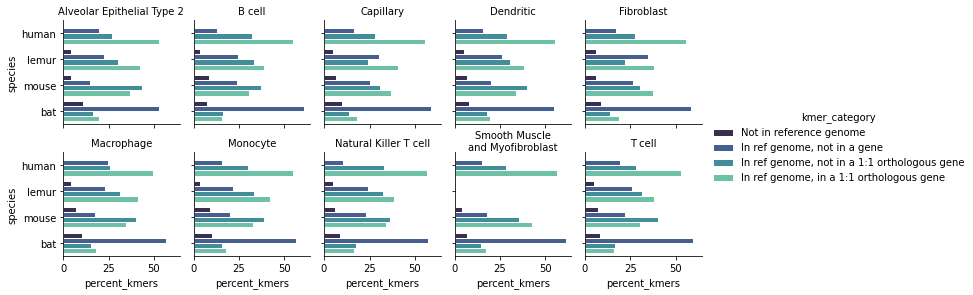

In [63]:
g = sns.catplot(
    data=diagnostic_kmers_n_per_category_df,
    col=celltype_col,
    order=species_order,
    col_wrap=5,
    y="species",
    x="percent_kmers",
    hue="kmer_category",
    hue_order=kmer_categories,
    palette='mako',
    kind='bar',
    height=2,
    linewidth=1,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    if title == 'Smooth Muscle and Myofibroblast':
        ax.set_title('Smooth Muscle\nand Myofibroblast', fontsize=10, pad=-20)
pdf = os.path.join(figure_folder, 'unstacked_barplot__col-celltype__y-species__hue-kmer_category.pdf')
g.savefig(pdf)

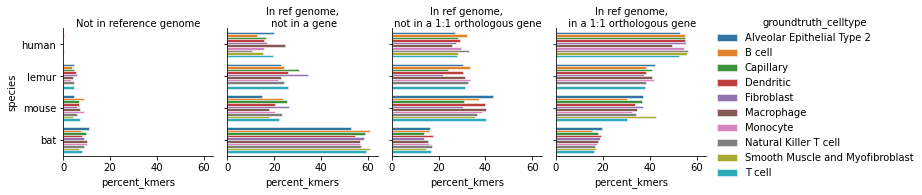

In [64]:
g = sns.catplot(
    data=diagnostic_kmers_n_per_category_df,
    hue=celltype_col,
#     col_wrap=2,
    y="species",
    order=species_order,
    x="percent_kmers",
    col="kmer_category",
    col_order=kmer_categories,
    palette='tab10',
    kind='bar',
    height=2.5,
    sharex=True,
        linewidth=.5,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    if ax.is_last_row():
        title = ax.get_title()
        title = title.replace(',', ',\n')
        ax.set_title(title, fontsize=10, pad=-20)
#     if ax.is_first_col():
#         ax.set(xscale='log')
pdf = os.path.join(figure_folder, 'unstacked_barplot__col-kmer_category__y-species__hue-celltype.pdf')
g.savefig(pdf)

In [65]:
species_order_no_lemur = ['human','mouse', 'bat']

In [ ]:
diagnostic_kmers_n_per_category_df_no_lemur = diagnostic_kmers_n_per_category_df.query(
    "species in @species_order_no_lemur"
)
diagnostic_kmers_n_per_category_df_no_lemur.species = pd.Categorical(
    diagnostic_kmers_n_per_category_df_no_lemur.species,
    categories=species_order_no_lemur,
    ordered=True,
)
describe(diagnostic_kmers_n_per_category_df_no_lemur)

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(12, 3), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
#         yticks=species_order,
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, 'stacked_barplot__col-celtype__y-species__hue-kmer_category.pdf')
fig.savefig(pdf)

In [ ]:
figure_folder

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(4.5, 6), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, 'stacked_barplot__col-celtype__y-species__hue-kmer_category__two_column.pdf')
fig.savefig(pdf)

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)


for (species, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby("species"), axes.flat
):
    legend = ax.is_last_col()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y=celltype_col,
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=legend,
        ax=ax,
    )
    ax.set(
        ylabel="percentage",
        title=species,
#         yticks=["bat", "human"],
    )
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

sns.despine()
fig.tight_layout()

pdf = os.path.join(figure_folder, 'stacked_barplot__col-species__y-celltype__hue-kmer_category.pdf')
fig.savefig(pdf)

In [ ]:
1+1

## Get number of k-mers in different categories per `predicted_compartment`

In [ ]:
%%time

celltype_col = "predicted_compartment"

compartment_kmers_n_per_category = hash2kmer_with_predictions.groupby(
    ["species", celltype_col, "kmer_category"]
).hashval.nunique()
compartment_kmers_n_per_category.name = "percent_kmers"
compartment_kmers_n_per_category

In [ ]:
compartment_kmers_n_per_category_df = compartment_kmers_n_per_category.groupby(level=[0, 1]).apply(lambda x: 100*x/x.sum()).reset_index()
compartment_kmers_n_per_category_df

In [ ]:
compartment_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

In [ ]:
compartment_kmers_n_per_category_df.query(
    '(species == "mouse") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

In [ ]:
compartment_kmers_n_per_category_df.query(
    '(species == "lemur") and (kmer_category == "Not in reference genome")'
).sort_values('percent_kmers')

# Plot percentage of kmers in ref genome, etc

In [ ]:
figure_folder = '/home/olga/googledrive/kmer-homology-paper/figures/kmer_gene_orthology'
! mkdir $figure_folder

In [ ]:
species_order = 'human', 'lemur', 'mouse', 'bat'
compartment_kmers_n_per_category_df['species'] = pd.Categorical(compartment_kmers_n_per_category_df ['species'], categories=species_order, ordered=True)

In [ ]:
g = sns.catplot(
    data=compartment_kmers_n_per_category_df,
    col=celltype_col,
    order=species_order,
    col_wrap=5,
    y="species",
    x="percent_kmers",
    hue="kmer_category",
    hue_order=kmer_categories,
    palette='mako',
    kind='bar',
    height=2,
    linewidth=1,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    title = ax.get_title()
    if title == 'Smooth Muscle and Myofibroblast':
        ax.set_title('Smooth Muscle\nand Myofibroblast', fontsize=10, pad=-20)
pdf = os.path.join(figure_folder, f'unstacked_barplot__col-celltype__y-species__hue-kmer_category__{celltype_col}.pdf')
g.savefig(pdf)

In [ ]:
g = sns.catplot(
    data=compartment_kmers_n_per_category_df,
    hue=celltype_col,
#     col_wrap=2,
    y="species",
    order=species_order,
    x="percent_kmers",
    col="kmer_category",
    col_order=kmer_categories,
    palette='tab10',
    kind='bar',
    height=2.5,
    sharex=True,
        linewidth=.5,
    edgecolor='white'
#     legend=True,
)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    if ax.is_last_row():
        title = ax.get_title()
        title = title.replace(',', ',\n')
        ax.set_title(title, fontsize=10, pad=-20)
#     if ax.is_first_col():
#         ax.set(xscale='log')
pdf = os.path.join(figure_folder, f'unstacked_barplot__col-kmer_category__y-species__hue-celltype__{celltype_col}.pdf')
g.savefig(pdf)

In [ ]:
species_order_no_lemur = ['human','mouse', 'bat']

In [ ]:
compartment_kmers_n_per_category_df_no_lemur = compartment_kmers_n_per_category_df.query(
    "species in @species_order_no_lemur"
)
compartment_kmers_n_per_category_df_no_lemur.species = pd.Categorical(
    compartment_kmers_n_per_category_df_no_lemur.species,
    categories=species_order_no_lemur,
    ordered=True,
)
describe(compartment_kmers_n_per_category_df_no_lemur)

In [ ]:
compartment_kmers_n_per_category_df_no_lemur.query('kmer_category == "Not in reference genome"')

In [ ]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(12, 3), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    compartment_kmers_n_per_category_df_no_lemur.groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
#         yticks=species_order,
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, f'stacked_barplot__col-celtype__y-species__hue-kmer_category__{celltype_col}.pdf')
fig.savefig(pdf)

In [ ]:
figure_folder

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(4, 6), sharex=True, sharey=True)


for (celltype, df), ax in zip(
    compartment_kmers_n_per_category_df_no_lemur .groupby(celltype_col), axes.flat
):
    
#     legend = ax.is_last_col() and ax.is_last_row()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y="species",
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=False,
        ax=ax,
    )
    ax.set(
        ylabel="species",
        xlabel='Percentage',
        title=celltype.replace("and", "\nand"),
    )
    
# Fix the legend so it's not on top of the bars.
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 1))
sns.despine()
fig.tight_layout()
pdf = os.path.join(figure_folder, f'stacked_barplot__col-celtype__y-species__hue-kmer_category__two_column__{celltype_col}.pdf')
fig.savefig(pdf)

In [ ]:
pdf

In [ ]:
f

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)


for (species, df), ax in zip(
    diagnostic_kmers_n_per_category_df_no_lemur.groupby("species"), axes.flat
):
    legend = ax.is_last_col()
    # One liner to create a stacked bar chart.
    sns.histplot(
        df,
        y=celltype_col,
        hue="kmer_category",
        weights="percent_kmers",
        multiple="stack",
        palette="mako",
        linewidth=1,
        edgecolor="white",
        legend=legend,
        ax=ax,
    )
    ax.set(
        ylabel="percentage",
        title=species,
#         yticks=["bat", "human"],
    )
# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

sns.despine()
fig.tight_layout()

pdf = os.path.join(figure_folder, 'stacked_barplot__col-species__y-celltype__hue-kmer_category.pdf')
fig.savefig(pdf)

# Subset to only diagnostic k-mers

In [ ]:
mouse_celltype_kmers['hashval'] = mouse_celltype_kmers.hashval.astype(str)

In [ ]:
describe(mouse_celltype_kmers)

In [ ]:
mouse_celltype_kmers.dtypes

In [ ]:
diagnostic_hashvals = set(mouse_celltype_kmers.hashval)
len(diagnostic_hashvals)

In [ ]:
hash2kmer_with_predictions.dtypes

In [ ]:
%%time

hash2kmer_with_predictions_diagnostic_kmers = hash2kmer_with_predictions.query('hashval in @diagnostic_hashvals')
describe(hash2kmer_with_predictions_diagnostic_kmers)

In [ ]:
diagnostic_kmers_n_per_category_df_no_lemur